In [1]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 37.6 MB/s eta 0:00:00


In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
biopred_1981_2010 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/'
biopred_2010_2040 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/'
bioclimate_variables1 = [os.path.join(biopred_1981_2010, f) for f in os.listdir(biopred_1981_2010) if f.endswith(".tif")]
bioclimate_variables2 = [os.path.join(biopred_2010_2040, f) for f in os.listdir(biopred_2010_2040) if f.endswith(".tif")]


Diaprepes_abbreviatus(2012-2023)




/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)



Percentage of matching pixels for Annual_mean_Temperature_Chelsa_Prediction_1981-2010.tif and Annual_mean_Temperature_Chelsa_Prediction_2011-2040.tif: 99.58% 




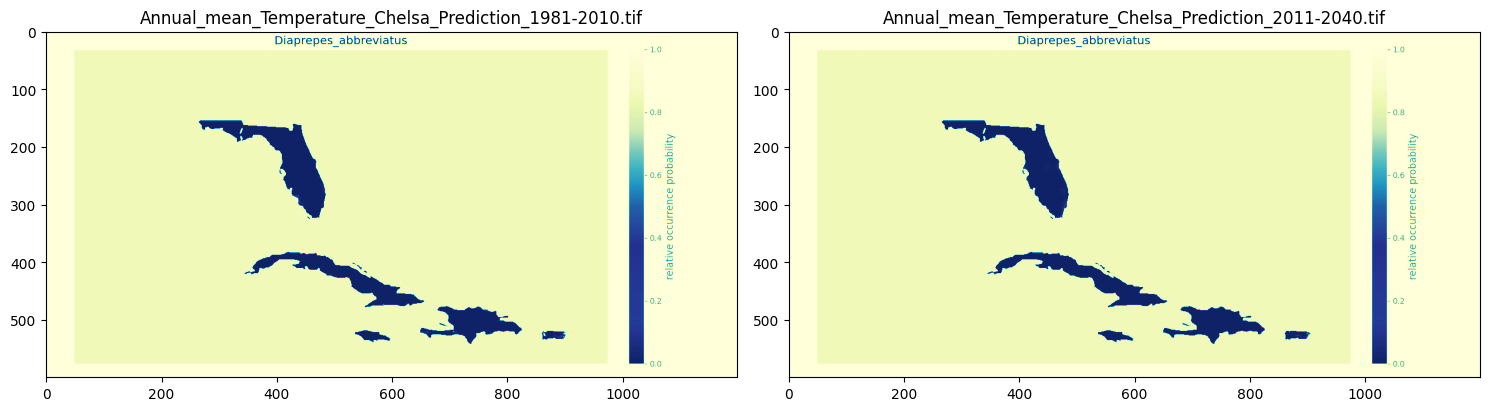


Percentage of matching pixels for Mean_Diurnal_Range_Chelsa_1981-2010.tif and Mean_Diurnal_Range_Chelsa_Prediction_2011_2040.tif: 98.59% 




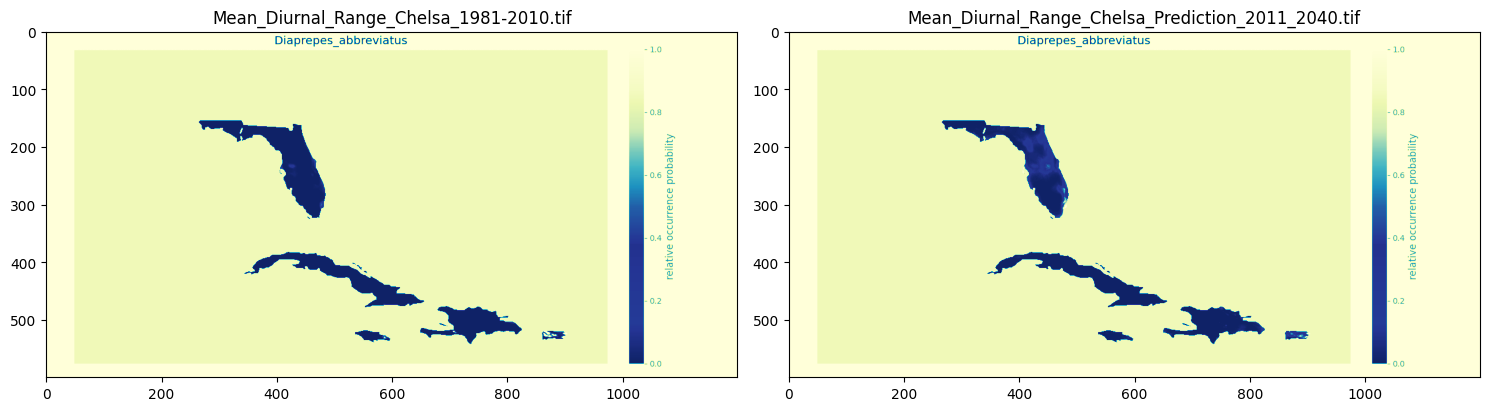


Percentage of matching pixels for Isothermality_Chelsa_Prediction_1981-2010.tif and Isothermality_Chelsa_Prediction_2011_2040.tif: 98.63% 




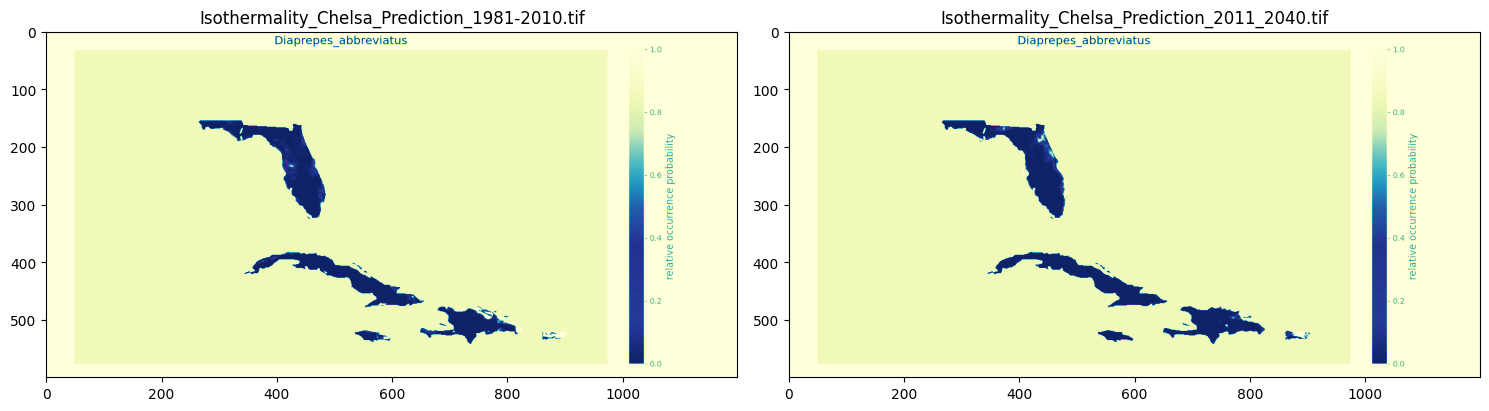


Percentage of matching pixels for Temperature_Seasonality_Chelsa_1981-2010.tif and Temperature_Seasonality_Chelsa_2011_2040.tif: 98.99% 




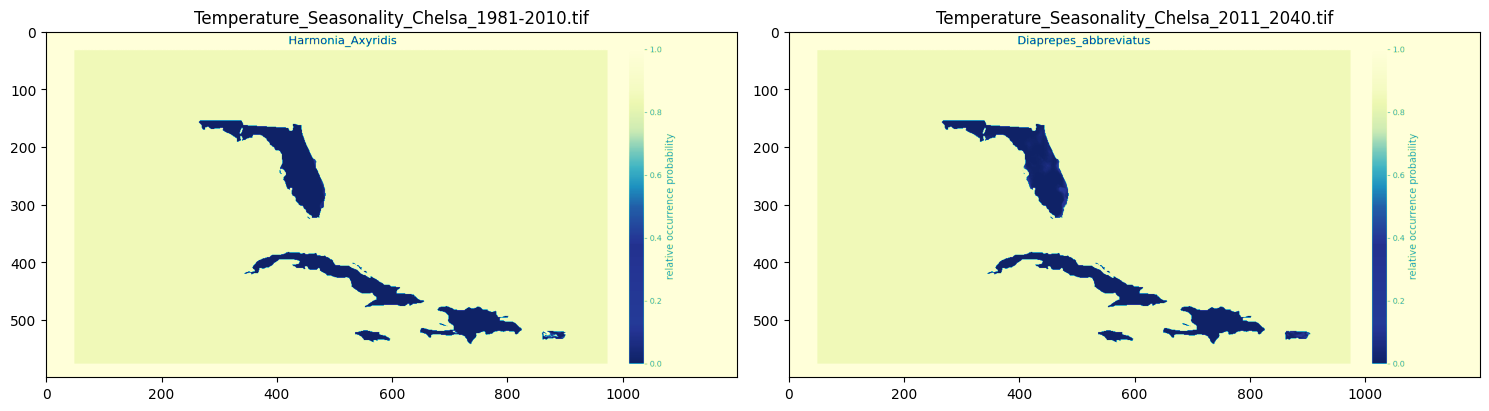


Percentage of matching pixels for Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_1981-2010.tif and Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_2011_2040.tif: 98.42% 




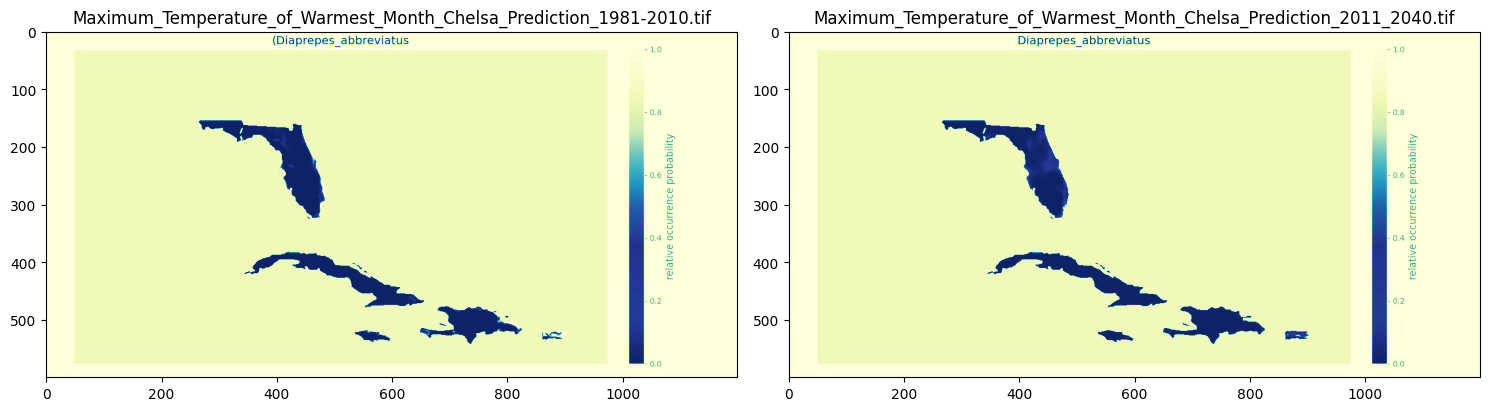


Percentage of matching pixels for Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_1981-2010.tif and Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_2011_2040.tif: 99.17% 




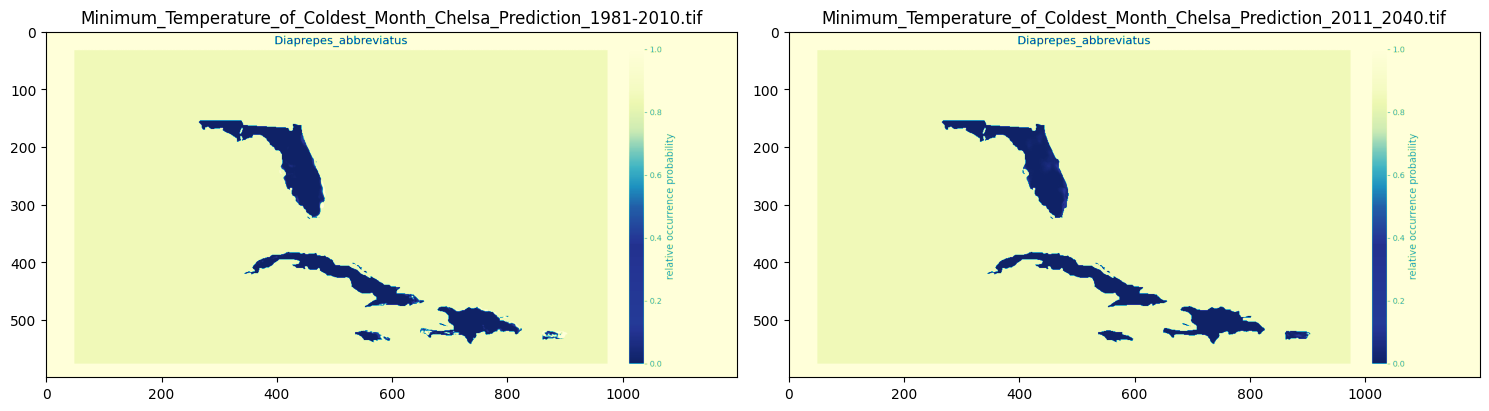


Percentage of matching pixels for Temperature_Annual_Range_Chelsa_Prediction_1981-2010.tif and Temperature_Annual_Range_Chelsa_Prediction_2011_2040.tif: 98.15% 




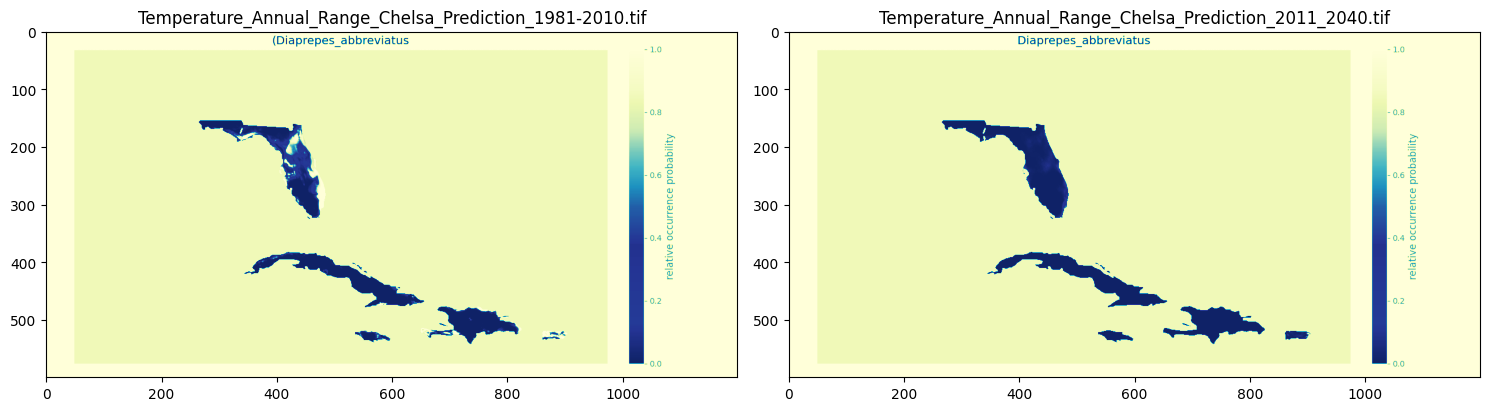


Percentage of matching pixels for Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif and Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif: 98.39% 




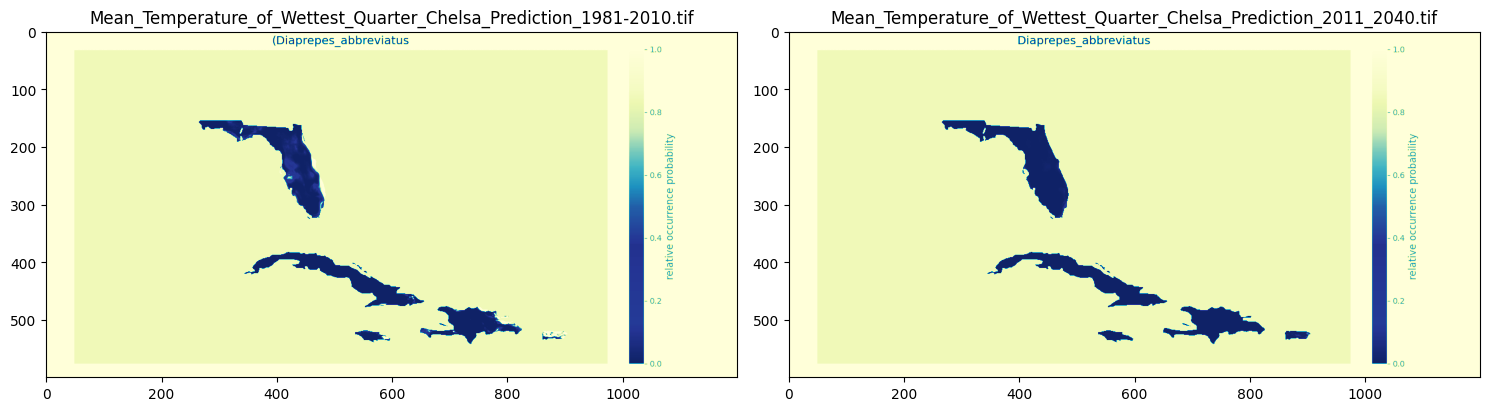


Percentage of matching pixels for Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif and Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif: 98.83% 




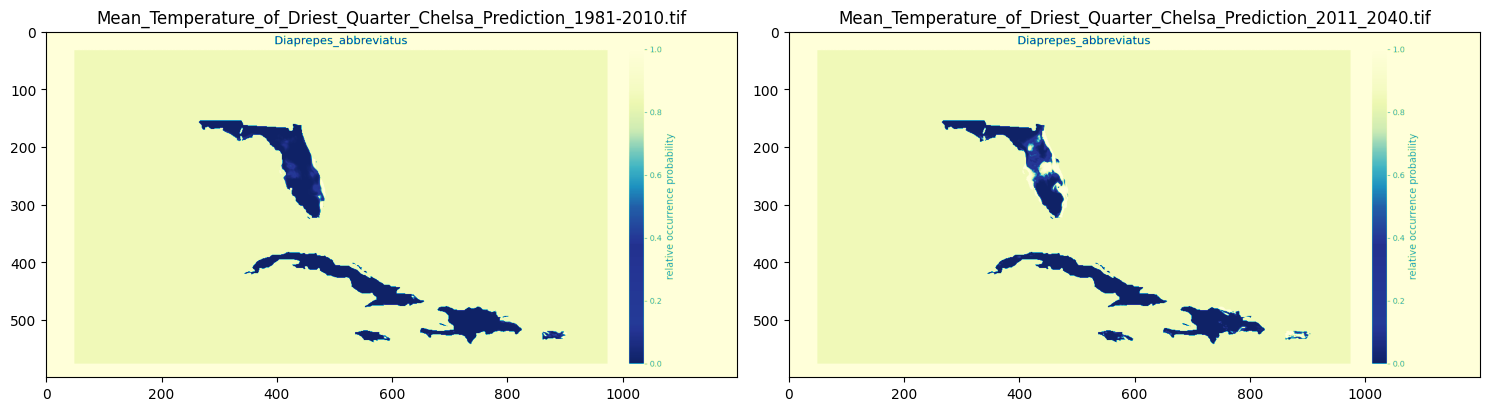


Percentage of matching pixels for Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif and Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif: 97.58% 




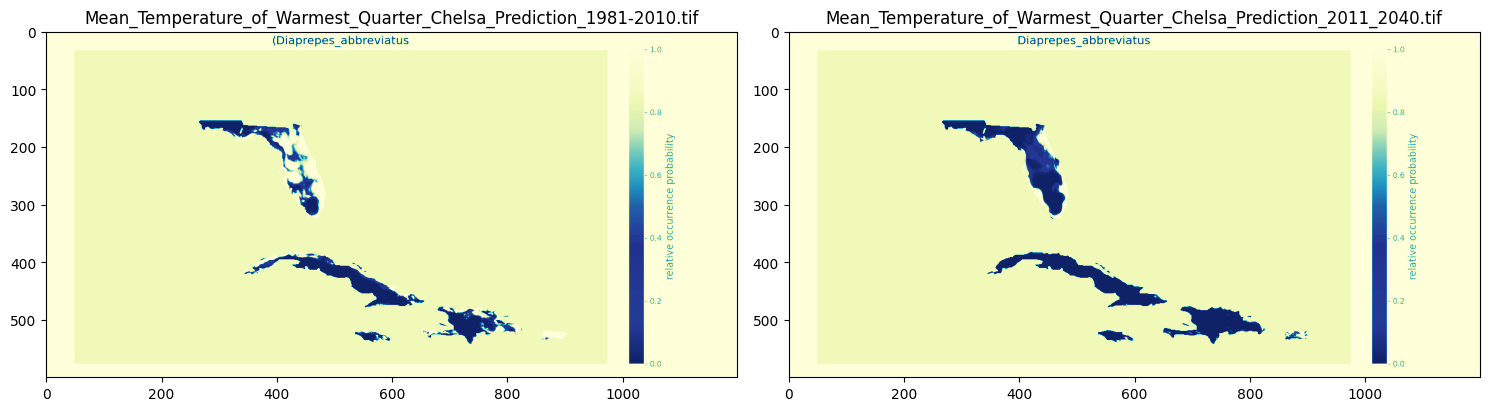


Percentage of matching pixels for Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif and Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif: 98.39% 




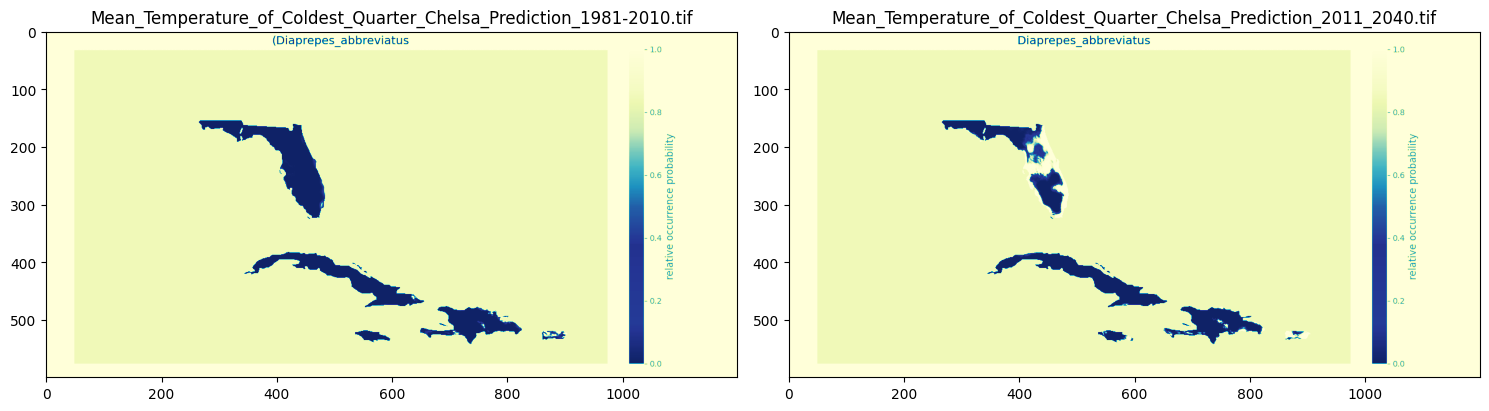


Percentage of matching pixels for Annual_Precipitation_Chelsa_Prediction_1981-2010.tif and Annual_Precipitation_Chelsa_Prediction_2011_2040.tif: 99.05% 




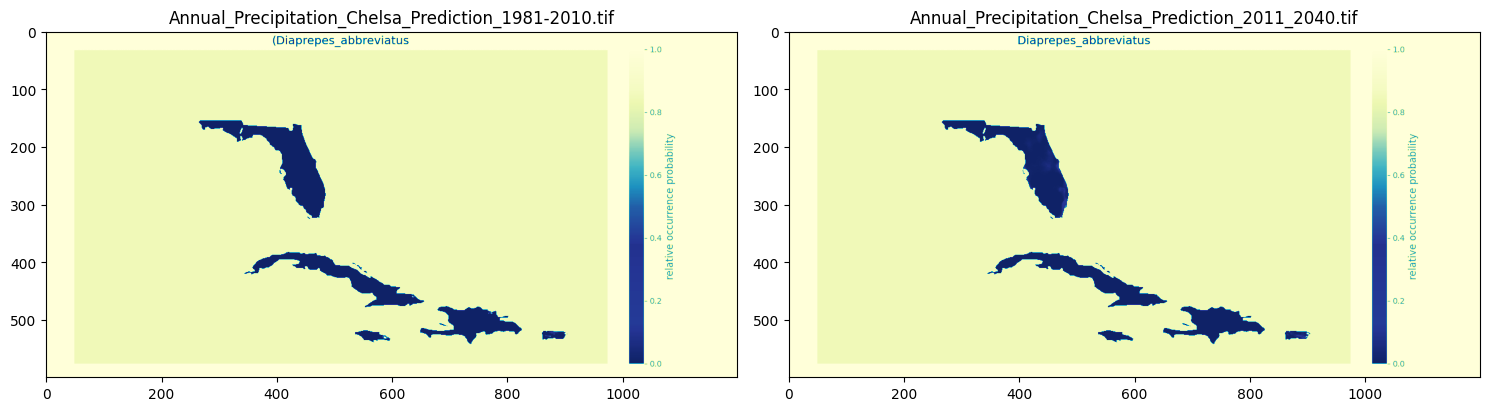


Percentage of matching pixels for Precipitation_of_Wettest_Month_Chelsa_Prediction_1981-2010.tif and Precipitation_of_Wettest_Month_Chelsa_Prediction_2011_2040.tif: 98.32% 




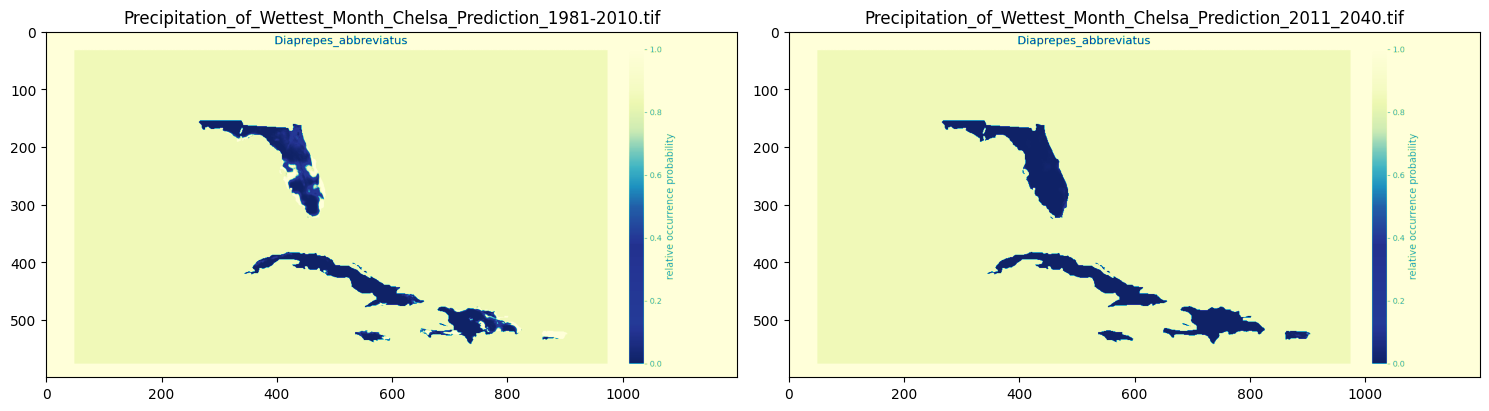


Percentage of matching pixels for Precipitation_of_Driest_Month_Chelsa_Prediction_1981-2010.tif and Precipitation_of_Driest_Month_Chelsa_Prediction_2011_2040.tif: 98.42% 




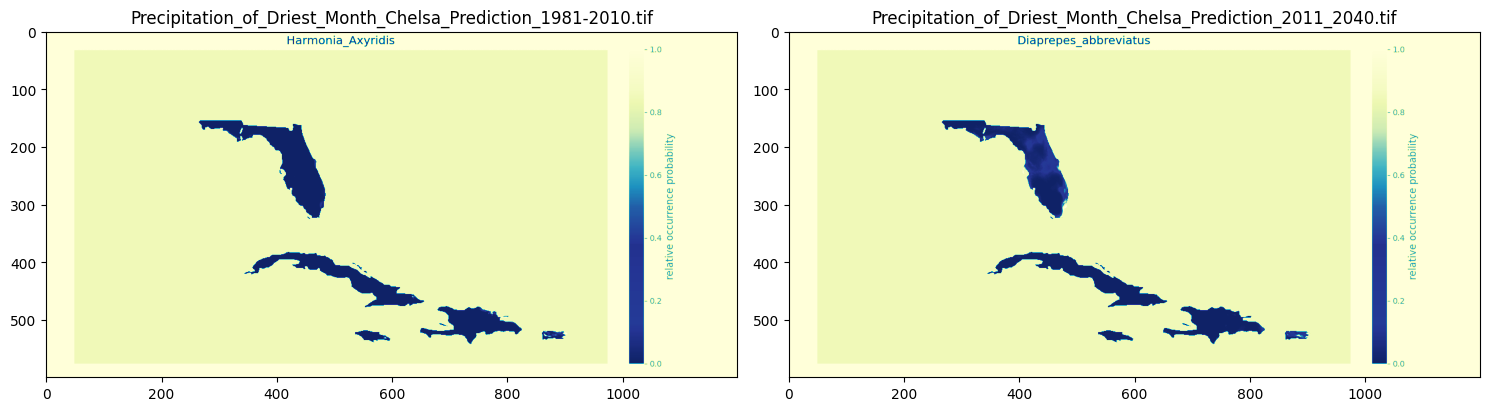


Percentage of matching pixels for Precipitation_of_Seasonality_Chelsa_Prediction_1981-2010.tif and Precipitation_of_Seasonality_Chelsa_Prediction_2011_2040.tif: 98.24% 




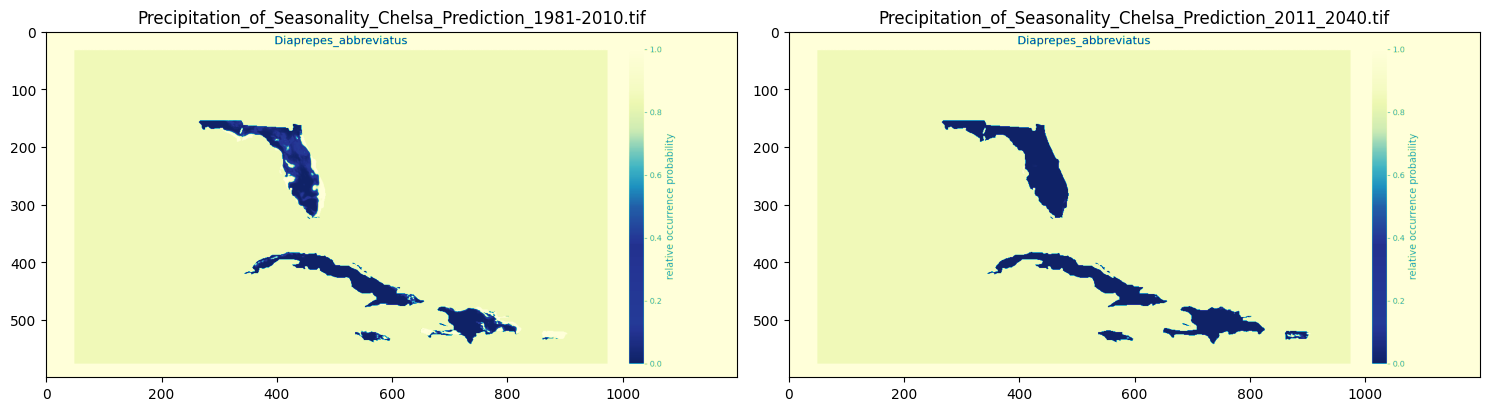


Percentage of matching pixels for Precipitation_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif and Precipitation_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif: 99.38% 




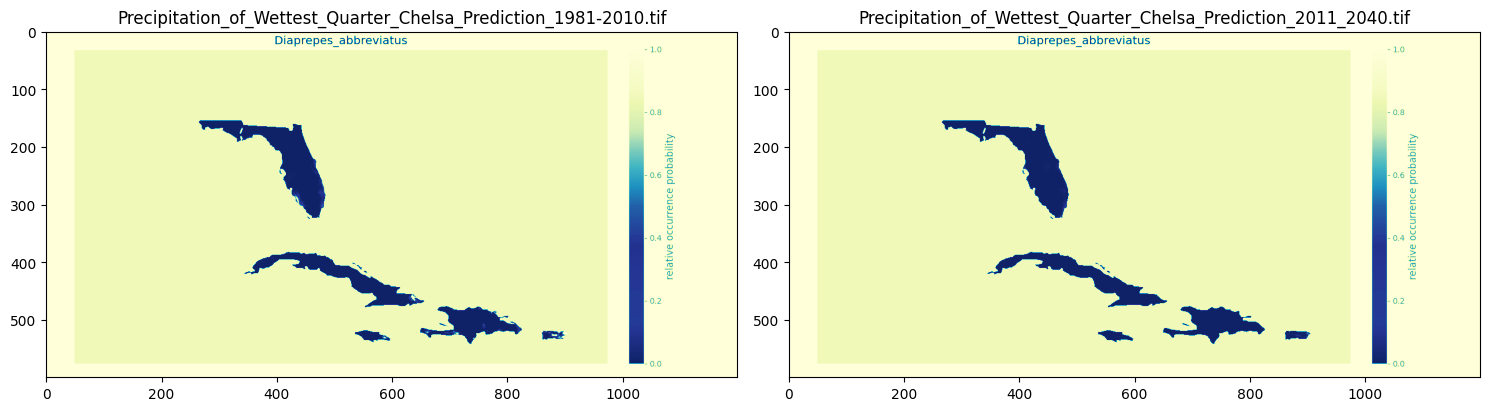


Percentage of matching pixels for Precipitation_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif and Precipitation_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif: 98.39% 




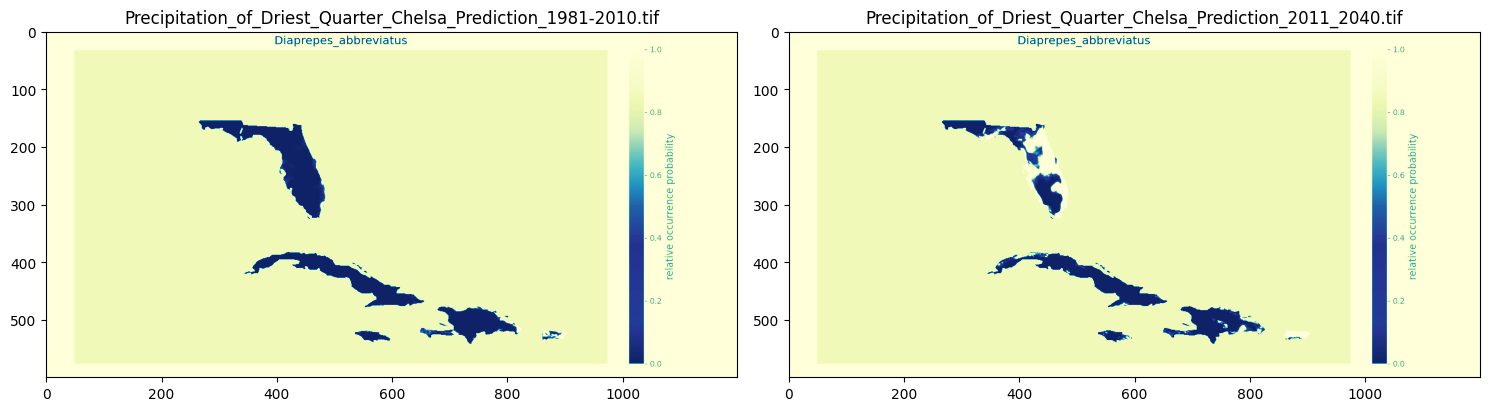


Percentage of matching pixels for Precipitation_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif and Precipitation_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif: 99.60% 




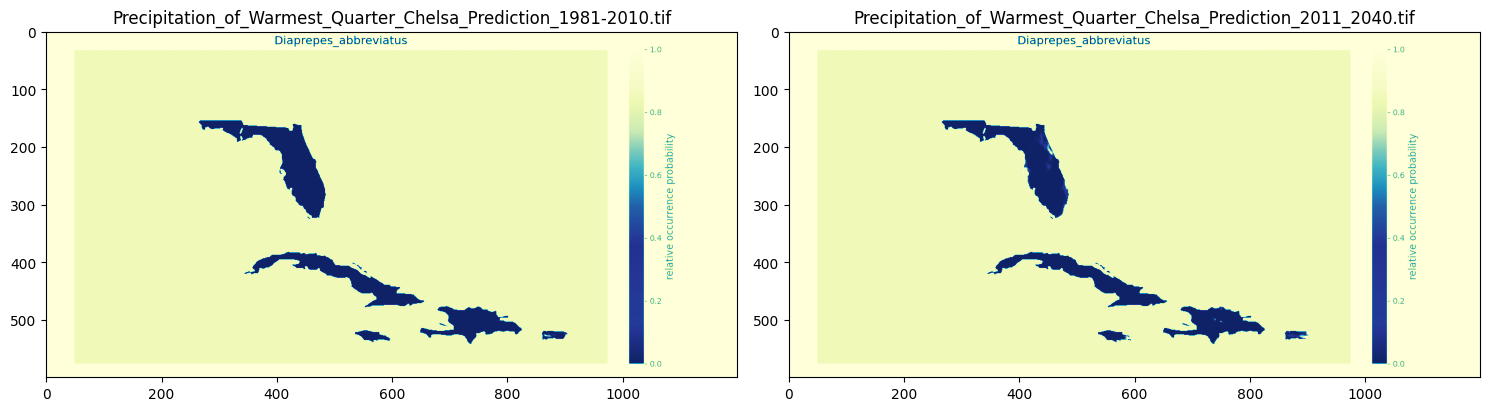


Percentage of matching pixels for Precipitation_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif and Precipitation_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif: 97.98% 




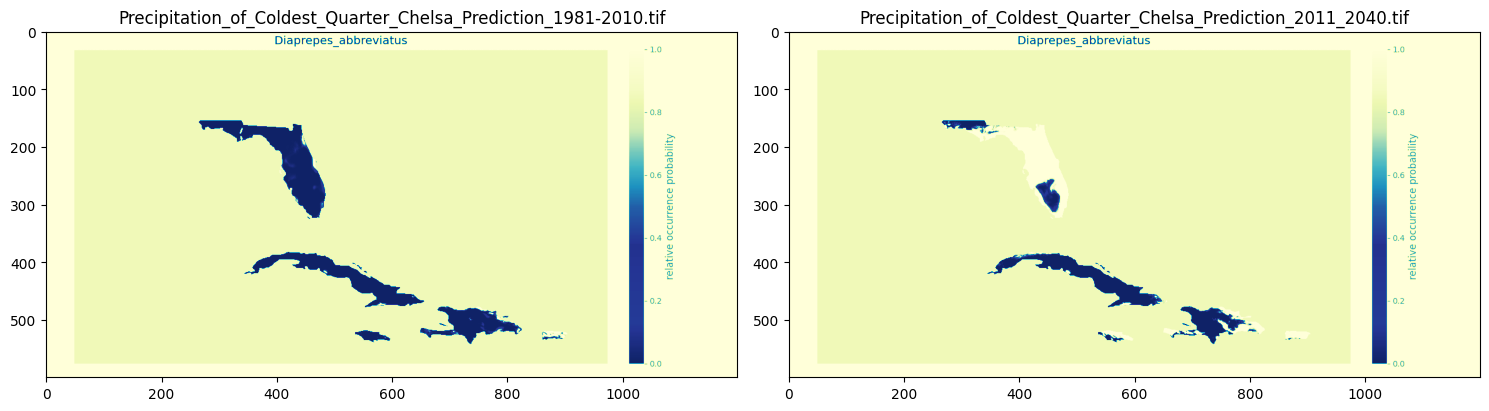

In [5]:
print("\nDiaprepes_abbreviatus(2012-2023)\n\n")

for i in range(len(bioclimate_variables1)):
    # Open the first TIFF file
    with rasterio.open(bioclimate_variables1[i]) as src1:
        # Read the data from the first file
        data1 = src1.read(1)

    # Open the second TIFF file
    with rasterio.open(bioclimate_variables2[i]) as src2:
        # Read the data from the second file
        data2 = src2.read(1)

    # Compare the two datasets
    comparison = np.equal(data1, data2)

    # Count the number of pixels that are the same
    num_same_pixels = np.count_nonzero(comparison)
    total_pixels = comparison.size

    # Calculate the percentage of matching pixels
    matching_percentage = (num_same_pixels / total_pixels) * 100

    # Print the result
    print(f"\nPercentage of matching pixels for {os.path.basename(bioclimate_variables1[i])} and {os.path.basename(bioclimate_variables2[i])}: {matching_percentage:.2f}% \n\n")

    # Plot the two datasets
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Plot the first dataset
    axes[0].imshow(data1, cmap='YlGnBu_r')
    axes[0].set_title(os.path.basename(bioclimate_variables1[i]))
    # Plot the second dataset
    axes[1].imshow(data2, cmap='YlGnBu_r')
    axes[1].set_title(os.path.basename(bioclimate_variables2[i]))

    plt.tight_layout()
    plt.show()